# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Loading Dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Data Visualization

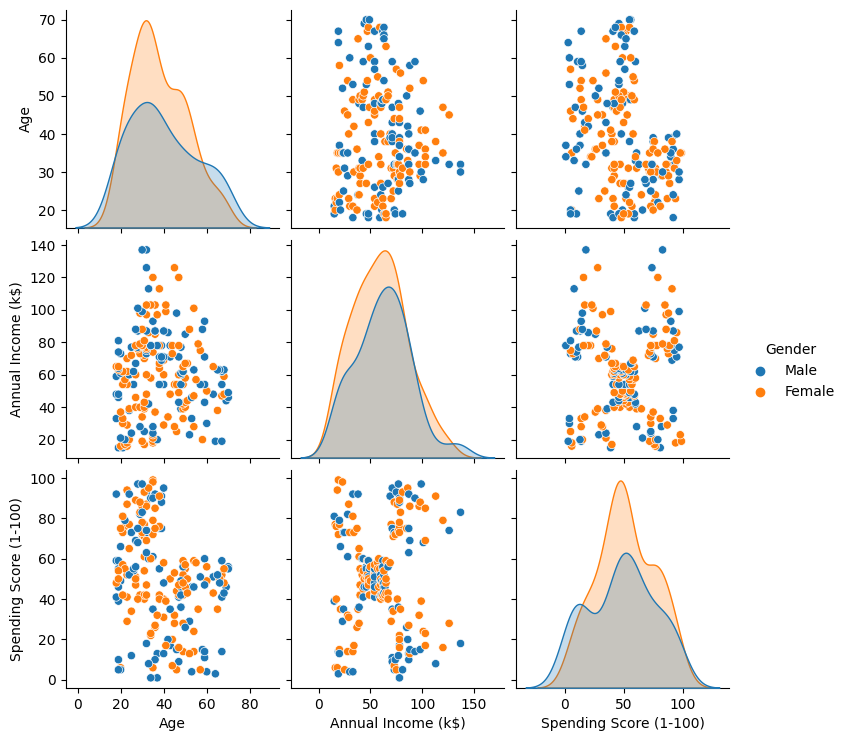

In [8]:
sns.pairplot(df.drop('CustomerID', axis=1),hue='Gender')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

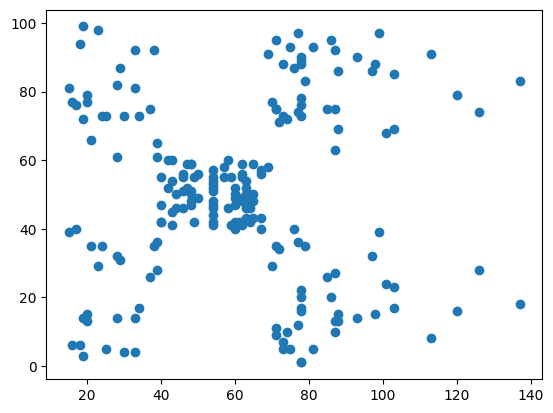

In [9]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)']) 
plt.show

## K-Means Clustering using Elbow Method

In [10]:
X= df.iloc[:, [3,4]].values

In [11]:
wcss=[]

for i in range(1,21):
    km= KMeans(n_clusters= i,n_init='auto')
    km.fit(X)
    wcss.append(km.inertia_)

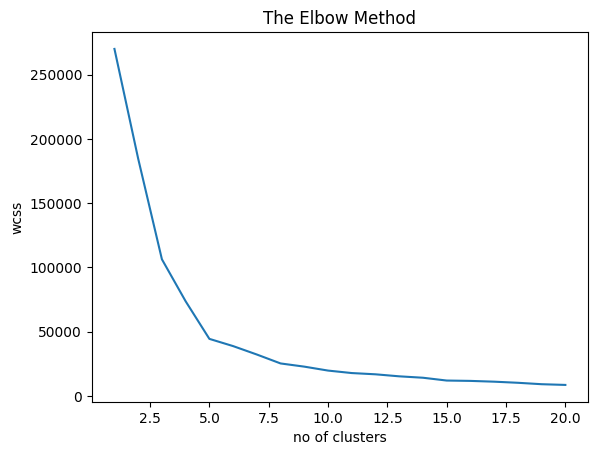

In [12]:
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
#building the model
kmeansmodel = KMeans(n_clusters= 5,n_init='auto')
y_kmeans= kmeansmodel.fit_predict(X)

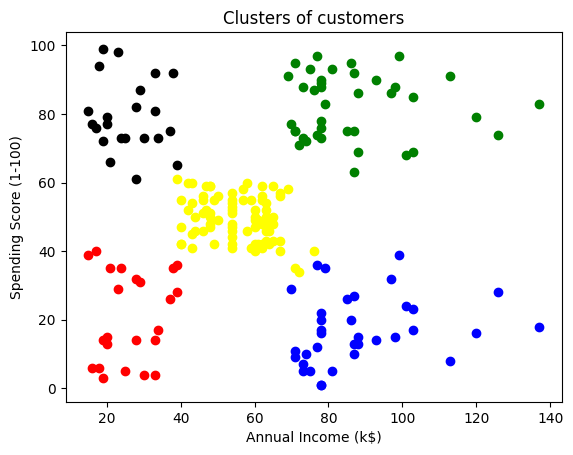

In [14]:
#Visualizing all the clusters 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'yellow')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'blue')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [16]:
df['target']=y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,3


In [18]:
df.drop('CustomerID',axis=1,inplace=True)
X=df.drop(['target'],axis=1)
y=df['target']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [21]:
lr_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,lr_pred))

Accuracy: 0.9666666666666667


# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [23]:
from sklearn.metrics import accuracy_score
nb_pred=nb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,nb_pred))

Accuracy: 0.9666666666666667


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
from sklearn.metrics import accuracy_score
dt_pred=dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test,dt_pred))

Accuracy: 0.9333333333333333
